<img src="nhanes_apple_color_tagline.jpg"> 

##    Análise para entender a Relação entre Depressão e Hábitos saudáveis

In [1]:
# Importando pacotes e bibliotecas
import pandas as pd
import numpy as np

In [2]:
demo_phq = pd.read_csv('DEMO_PHQ.csv')
pag_hei = pd.read_csv('PAG_HEI.csv')

In [3]:
demo_phq.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0


In [4]:
pag_hei.head()

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31128,NaN,NaN,3.083350,0.0,3.927008,5.000000,0.000000,5.000000,4.251329,0.000000,2.487572,6.911882,10.000000,0.818029,6.408092,47.887262
1,31129,285.450346,2.0,1.697761,0.0,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
2,31130,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31131,264.711316,2.0,3.115103,0.0,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
4,31132,1353.348730,3.0,3.509081,0.0,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696


In [5]:
demo_phq.shape

(5334, 15)

In [6]:
pag_hei.shape

(9424, 17)

In [7]:
linhas_removidas = 0
for i in range(1,10,1):
    table_to_remove = demo_phq[demo_phq['DPQ0'+ str(i) +'0'] == 9]
    linhas_removidas += len(table_to_remove.index)
    #print(len(table_to_remove.index))
    demo_phq.drop(table_to_remove.index, inplace = True)
    #print(demo_phq['DPQ0'+ str(i) +'0'].value_counts())
print(f'Foram removidas {linhas_removidas}Linhas do dataframe no total.')

Foram removidas 37Linhas do dataframe no total.


In [8]:
final_df = demo_phq.merge(pag_hei, how='inner', on='SEQN')
final_df.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393


In [9]:
def appendDPQ(lista_toappend):
    for i in range(1,10,1):
        lista_toappend.append("DPQ0"+ str(i) +"0")

In [10]:
column_list = []
appendDPQ(column_list)
column_list

['DPQ010',
 'DPQ020',
 'DPQ030',
 'DPQ040',
 'DPQ050',
 'DPQ060',
 'DPQ070',
 'DPQ080',
 'DPQ090']

In [11]:
final_df["phq9"] = final_df[column_list].sum(axis=1)
final_df.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,phq9
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,4.0


In [12]:
(final_df.isnull() | final_df.empty | final_df.isna()).sum()

SEQN                          0
DPQ010                      498
DPQ020                      498
DPQ030                      498
DPQ040                      498
DPQ050                      498
DPQ060                      498
DPQ070                      498
DPQ080                      498
DPQ090                      498
RIAGENDR                      0
RIDAGEYR                      0
RIDRETH1                      0
DMDEDUC                       0
INDFMINC                     47
PAG_MINW                      0
ADHERENCE                     0
HEI2015C1_TOTALVEG          270
HEI2015C2_GREEN_AND_BEAN    270
HEI2015C3_TOTALFRUIT        270
HEI2015C4_WHOLEFRUIT        270
HEI2015C5_WHOLEGRAIN        270
HEI2015C6_TOTALDAIRY        270
HEI2015C7_TOTPROT           270
HEI2015C8_SEAPLANT_PROT     270
HEI2015C9_FATTYACID         270
HEI2015C10_SODIUM           270
HEI2015C11_REFINEDGRAIN     270
HEI2015C12_SFAT             270
HEI2015C13_ADDSUG           270
HEI2015_TOTAL_SCORE         270
phq9    

In [13]:
final_df.dropna(inplace = True)

In [14]:
final_df.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,phq9
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,4.0
5,31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,5.000000,3.372033,0.000000,0.002362,5.223435,7.787420,0.000000,10.000000,46.086131,6.0


In [15]:
final_df.shape

(4669, 32)

In [16]:
for index, row in final_df.iterrows():
    if row['phq9'] < 5:
        final_df.loc[index,'phq_grp'] =  float(0)
    elif row['phq9'] < 10:
        final_df.loc[index,'phq_grp'] =  float(1)
    elif row['phq9'] < 15:
        final_df.loc[index,'phq_grp'] =  float(2)
    elif row['phq9'] < 19:
        final_df.loc[index,'phq_grp'] =  float(3)
    elif row['phq9'] >= 19 :
        final_df.loc[index,'phq_grp'] =  float(4)

final_df

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,phq9,phq_grp
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0.0,0.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0.0,0.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0.0,0.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,4.0,0.0
5,31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,3.372033,0.000000,0.002362,5.223435,7.787420,0.000000,10.000000,46.086131,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5292,41466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,4.672204,4.633477,0.000000,6.580006,8.393244,9.360990,59.949915,2.0,0.0
5293,41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,...,3.759596,2.344264,4.780282,3.134216,1.986137,5.850269,10.000000,57.747869,10.0,2.0
5294,41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,0.000000,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323,2.0,0.0
5295,41472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,5.000000,2.090534,8.409844,8.936854,3.063795,0.000000,46.134467,0.0,0.0


In [17]:
final_df['phq_grp'].value_counts()

0.0    3706
1.0     678
2.0     191
3.0      60
4.0      34
Name: phq_grp, dtype: int64

In [18]:
for index, row in final_df.iterrows():
    if row['HEI2015_TOTAL_SCORE'] < 25:
        final_df.loc[index,'TotalScore_grp'] =  float(0)
    elif row['HEI2015_TOTAL_SCORE'] < 50:
        final_df.loc[index,'TotalScore_grp'] =  float(1)
    elif row['HEI2015_TOTAL_SCORE'] < 75:
        final_df.loc[index,'TotalScore_grp'] =  float(2)
    elif row['HEI2015_TOTAL_SCORE'] <= 100:
        final_df.loc[index,'TotalScore_grp'] =  float(3)

final_df

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,phq9,phq_grp,TotalScore_grp
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0.0,0.0,1.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0.0,0.0,2.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0.0,0.0,1.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,4.0,0.0,1.0
5,31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.000000,0.002362,5.223435,7.787420,0.000000,10.000000,46.086131,6.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5292,41466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.672204,4.633477,0.000000,6.580006,8.393244,9.360990,59.949915,2.0,0.0,2.0
5293,41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,...,2.344264,4.780282,3.134216,1.986137,5.850269,10.000000,57.747869,10.0,2.0,2.0
5294,41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323,2.0,0.0,1.0
5295,41472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,2.090534,8.409844,8.936854,3.063795,0.000000,46.134467,0.0,0.0,1.0


In [19]:
#Modificando Adherence para obter 0 - muito baixa / 1 - baixa / 2 - padrão / 3 - pouco acima / 4 - acima 

for index, row in final_df.iterrows():
    if row['PAG_MINW'] < 75:
        final_df.loc[index,'ADHERENCE'] =  float(0)
    elif row['PAG_MINW'] < 150:
        final_df.loc[index,'ADHERENCE'] =  float(1)
    elif row['PAG_MINW'] < 225:
        final_df.loc[index,'ADHERENCE'] =  float(2)
    elif row['PAG_MINW'] < 300:
        final_df.loc[index,'ADHERENCE'] =  float(3)
    elif row['PAG_MINW'] >= 300:
        final_df.loc[index,'ADHERENCE'] =  float(4)

final_df

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,phq9,phq_grp,TotalScore_grp
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0.0,0.0,1.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0.0,0.0,2.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0.0,0.0,1.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,4.0,0.0,1.0
5,31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.000000,0.002362,5.223435,7.787420,0.000000,10.000000,46.086131,6.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5292,41466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.672204,4.633477,0.000000,6.580006,8.393244,9.360990,59.949915,2.0,0.0,2.0
5293,41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,...,2.344264,4.780282,3.134216,1.986137,5.850269,10.000000,57.747869,10.0,2.0,2.0
5294,41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323,2.0,0.0,1.0
5295,41472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,2.090534,8.409844,8.936854,3.063795,0.000000,46.134467,0.0,0.0,1.0


In [20]:
#pouco_saudavel = final_df.query('TotalScore_grp == "0"')
#normal = final_df.query('TotalScore_grp == "1"').phq_grp
#saudavel = final_df.query('TotalScore_grp == "2"').phq_grp
#muito_saudavel = final_df.query('TotalScore_grp == "3"').phq_grp

In [21]:
#print(len(pouco_saudavel))
#print(len(normal))
#print(len(saudavel))
#print(len(muito_saudavel))

In [22]:
# Testando a normalidade dos dados 
#nivel_significancia = 0.05

#stat_test, p_valor = st.shapiro(pouco_saudavel)
#print('Placebo: P-valor: ', round(p_valor,2), ', nível de significancia (alfa):',  round(nivel_significancia,2))

#stat_test, p_valor = st.shapiro(normal)
#print('TratNovo: P-valor: ', round(p_valor,2), ', nível de significancia (alfa):',  round(nivel_significancia,2))

#stat_test, p_valor = st.shapiro(saudavel)
#print('Padrao: P-valor: ', round(p_valor,2), ', nível de significancia (alfa):',  round(nivel_significancia,2))

#stat_test, p_valor = st.shapiro(muito_saudavel)
#print('Padrao: P-valor: ', round(p_valor,2), ', nível de significancia (alfa):',  round(nivel_significancia,2))

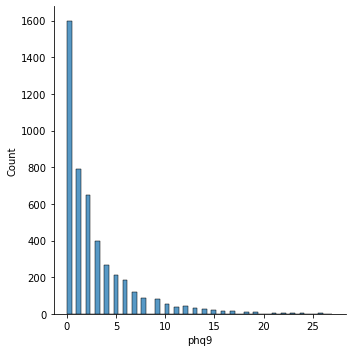

In [23]:
import seaborn as sns
sns.displot(data=final_df, x="phq9")

In [24]:
final_df["phq_grp"].isna().sum()

0

In [25]:
import seaborn as sns

In [26]:
#sns.displot(data=final_df, x="HEI2015_TOTAL_SCORE")

In [27]:
import scipy.stats as st

In [28]:
#st.ttest_1samp(a=final_df["HEI2015_TOTAL_SCORE"], popmean=final_df["HEI2015_TOTAL_SCORE"].mean())

<AxesSubplot:>

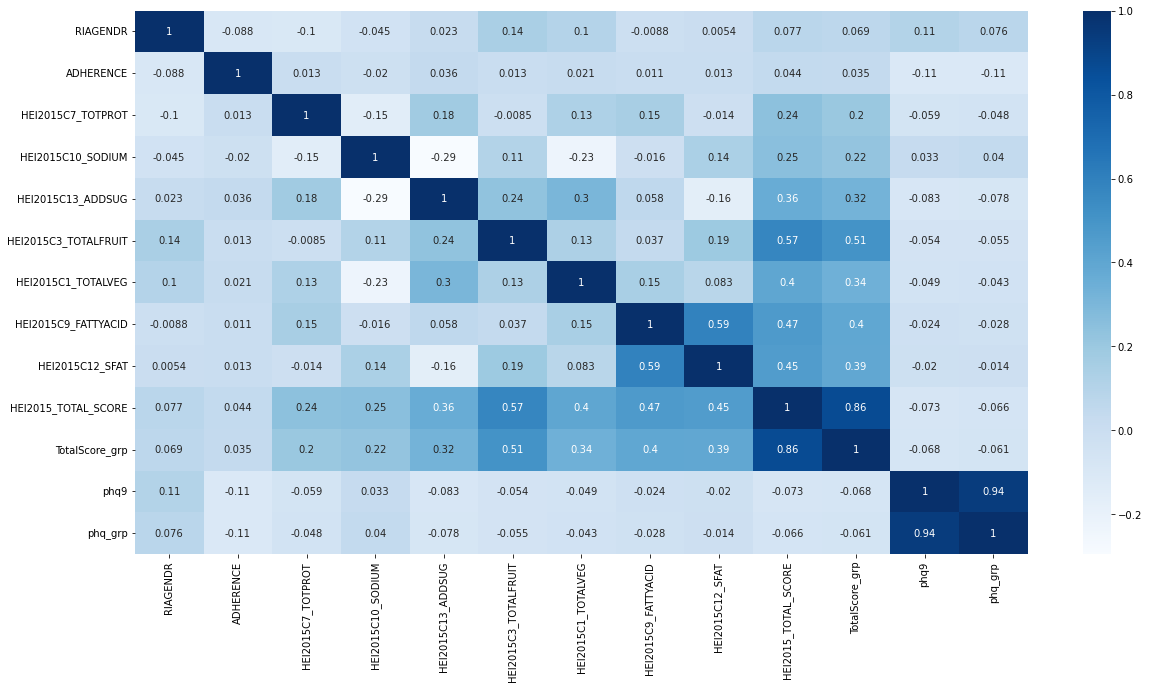

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
#lista_drop = ["SEQN"]
#appendDPQ(lista_drop)
#comentando para ver todas as correlações
#lista filtra para algumas correlações
lista = ["RIAGENDR", "ADHERENCE", "HEI2015C7_TOTPROT", "HEI2015C10_SODIUM", "HEI2015C13_ADDSUG", "HEI2015C3_TOTALFRUIT", "HEI2015C1_TOTALVEG", "HEI2015C9_FATTYACID", "HEI2015C12_SFAT", "HEI2015_TOTAL_SCORE", "TotalScore_grp", "phq9", "phq_grp"]
sns.heatmap(final_df[lista].corr(method='pearson'), cmap="Blues", annot=True)

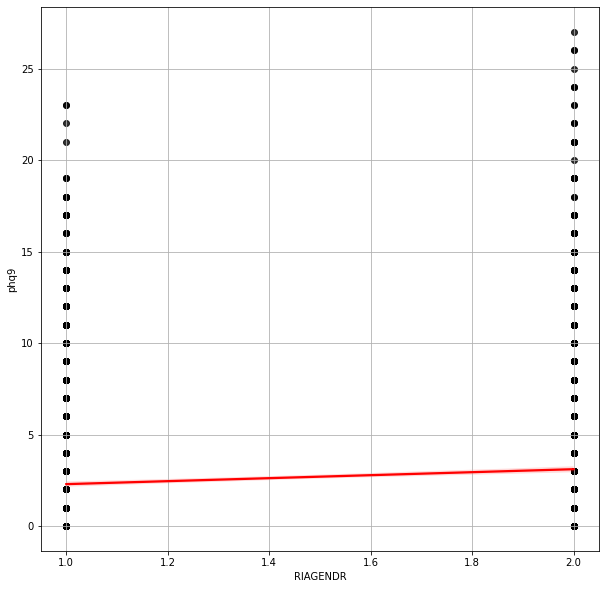

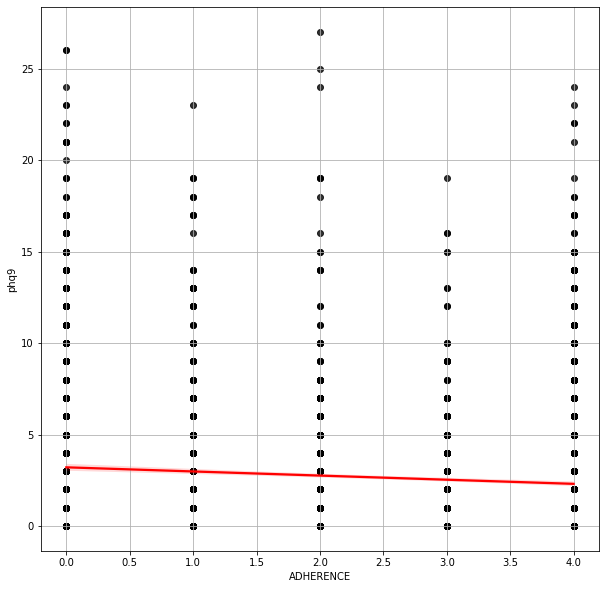

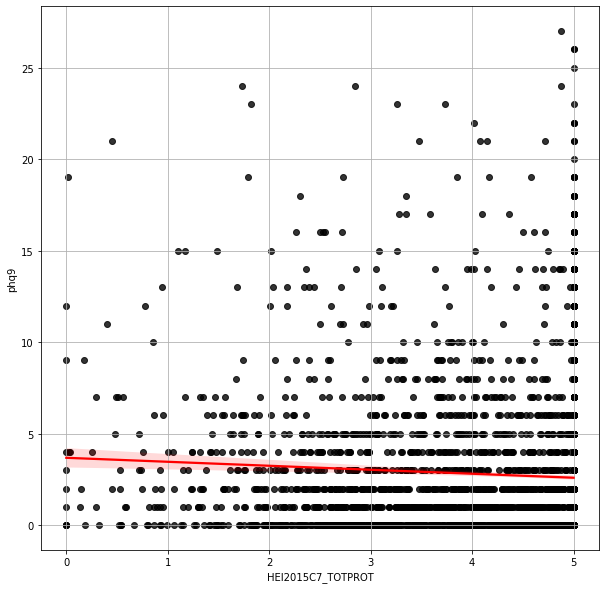

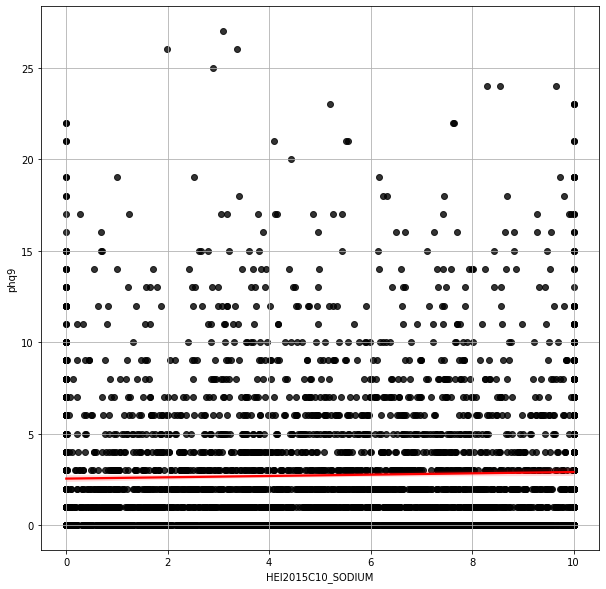

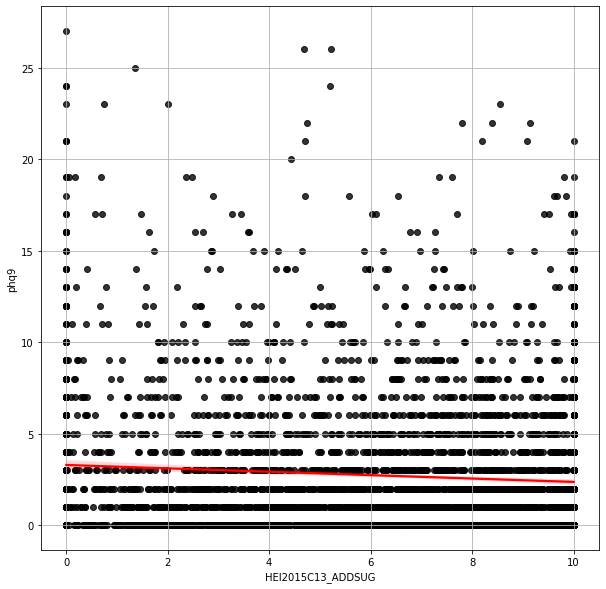

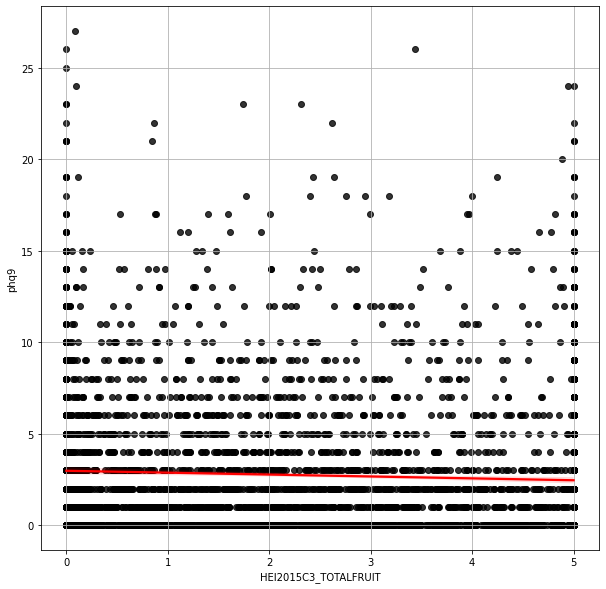

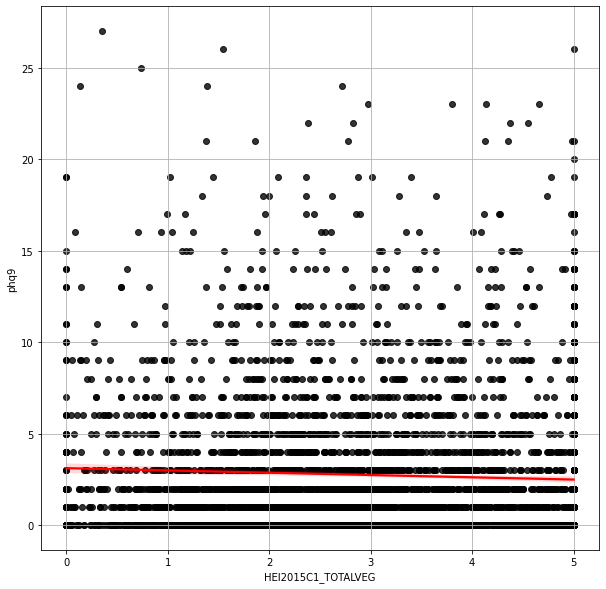

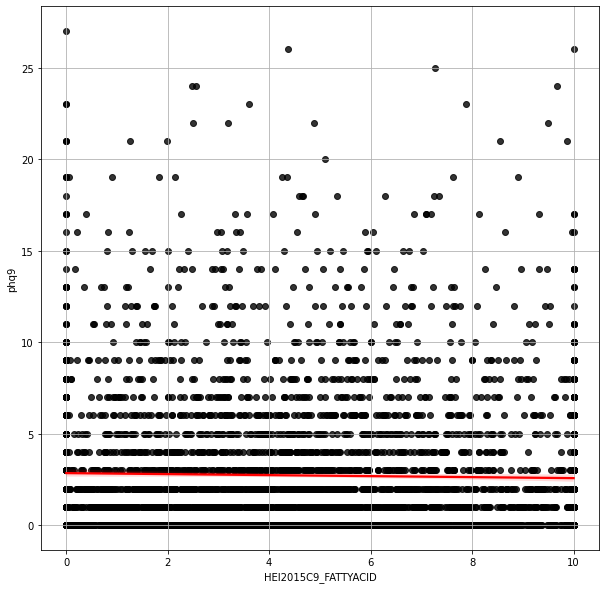

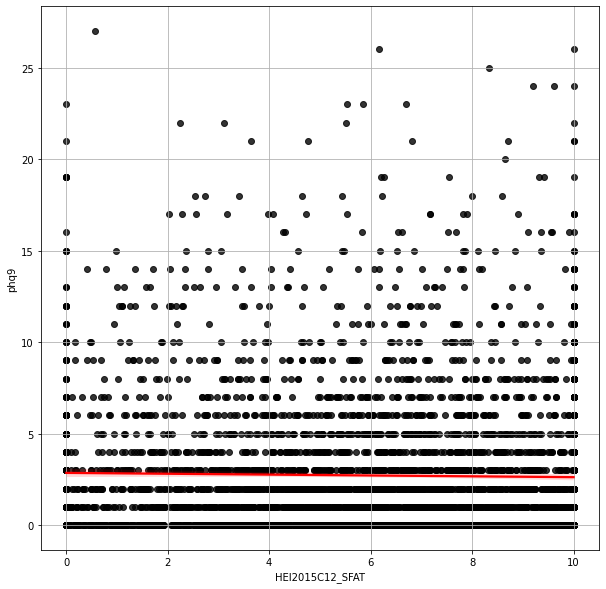

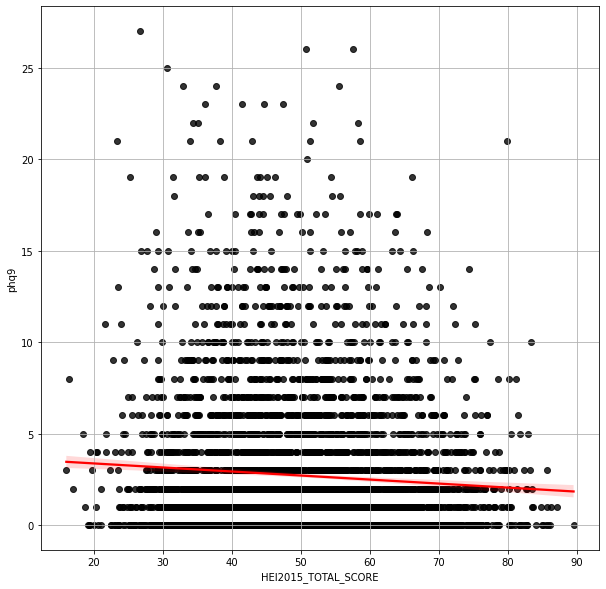

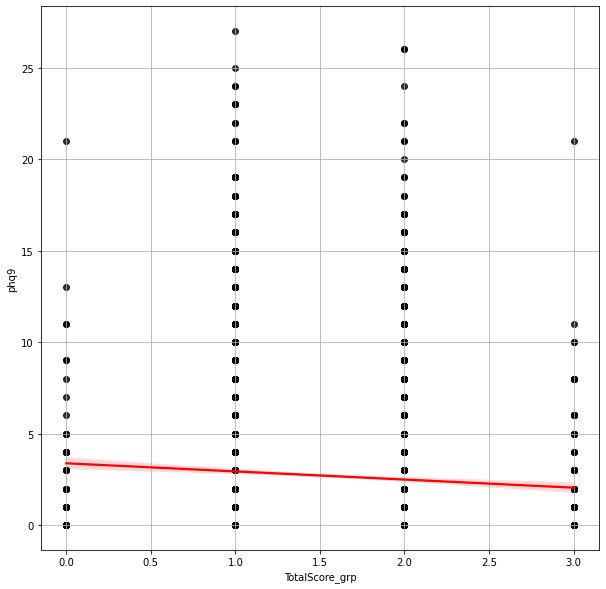

In [30]:
lista.remove("phq9")
lista.remove("phq_grp")
for name in lista:
    plt.figure(figsize=(10, 10))
    sns.regplot(x=final_df[name], y=final_df["phq9"], scatter_kws={"color": "black"}, line_kws={"color": "red"})
    plt.grid()
    plt.show()

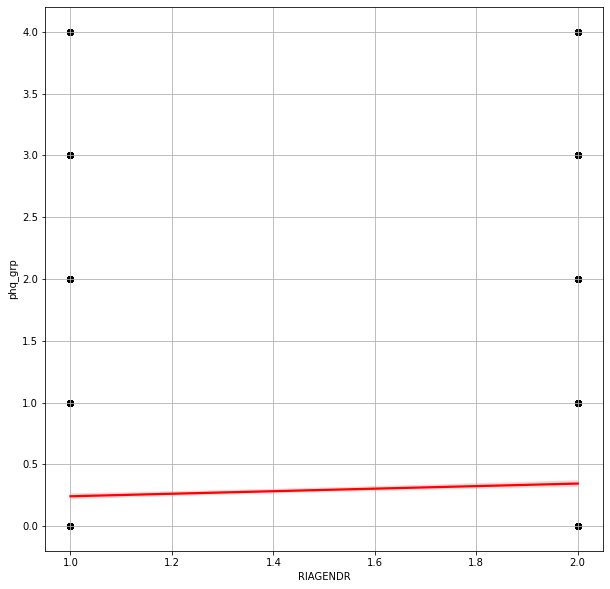

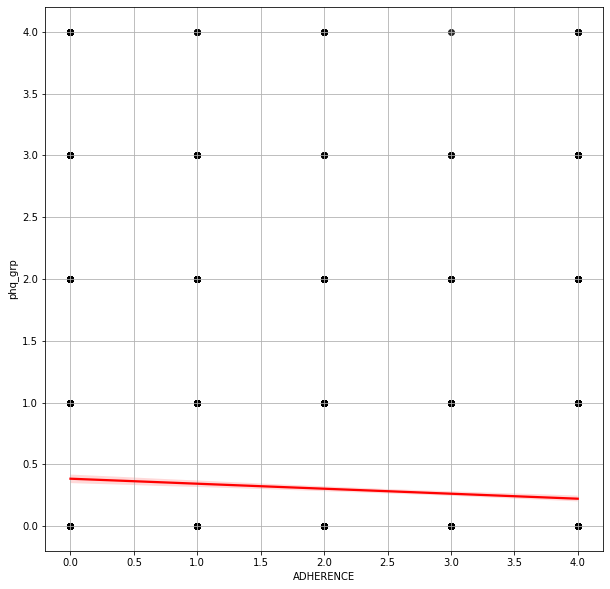

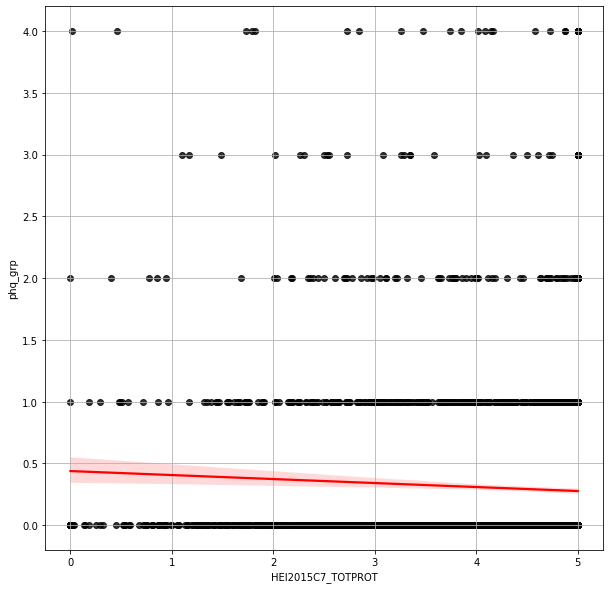

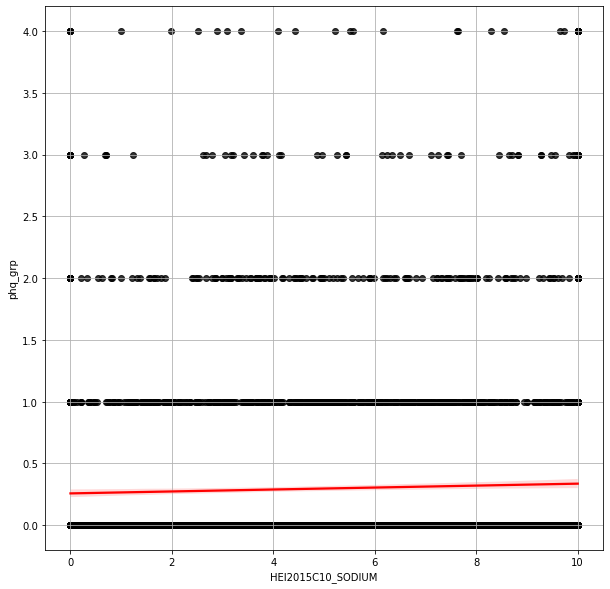

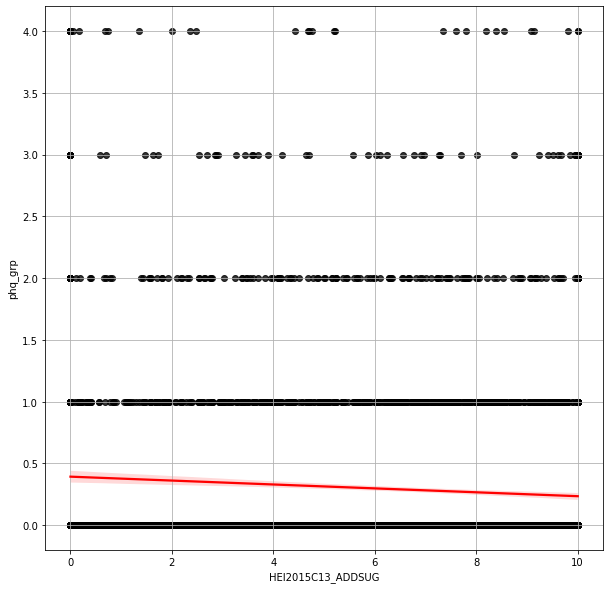

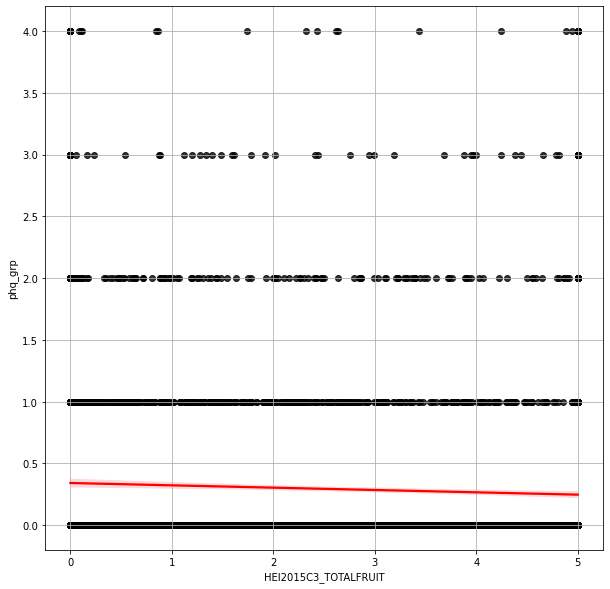

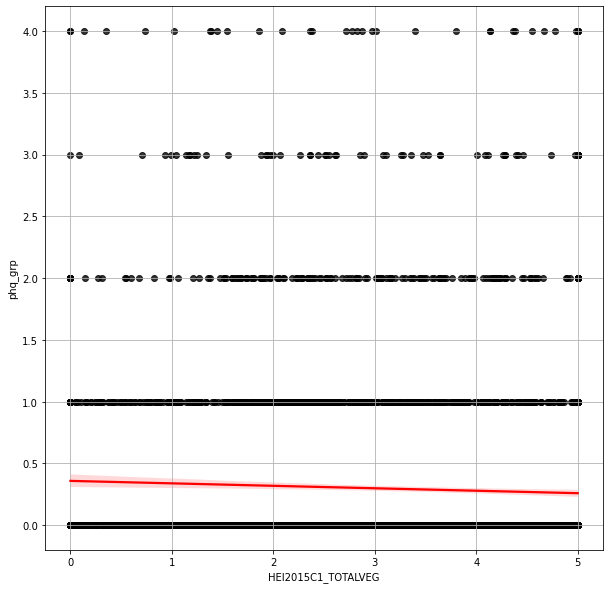

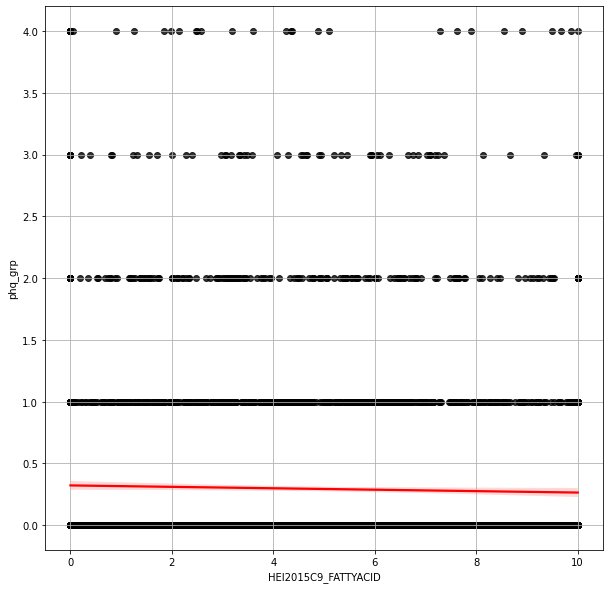

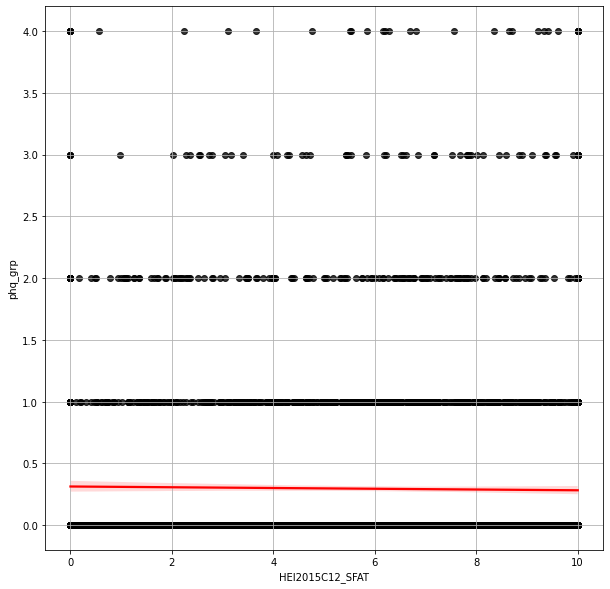

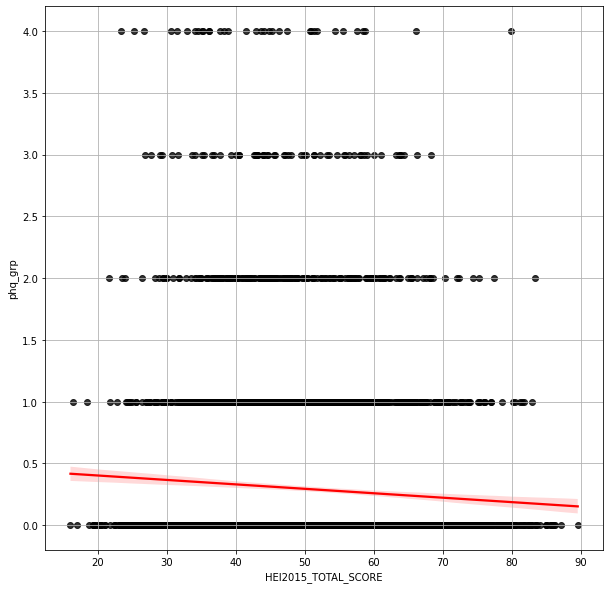

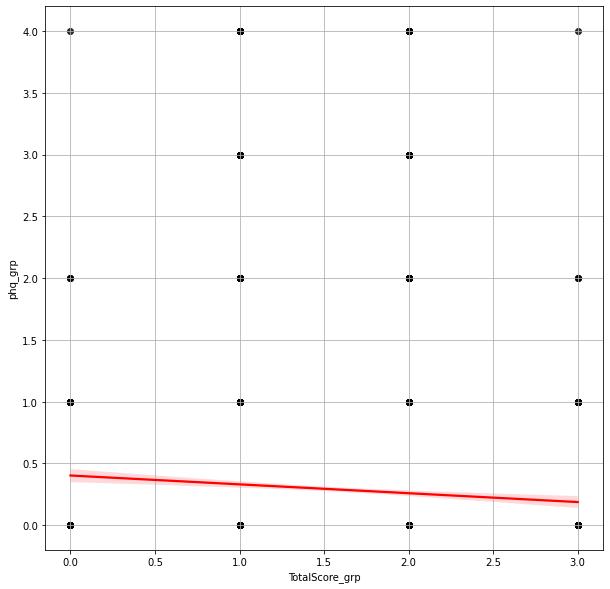

In [31]:
for name in lista:
    plt.figure(figsize=(10, 10))
    sns.regplot(x=final_df[name], y=final_df["phq_grp"], scatter_kws={"color": "black"}, line_kws={"color": "red"})
    plt.grid()
    plt.show()

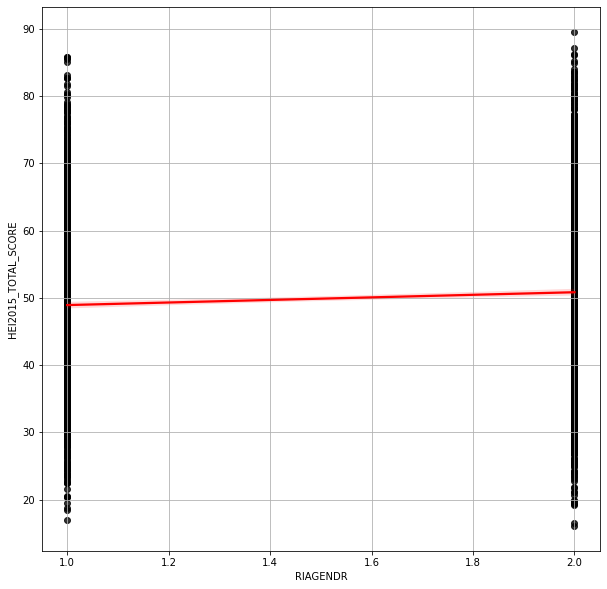

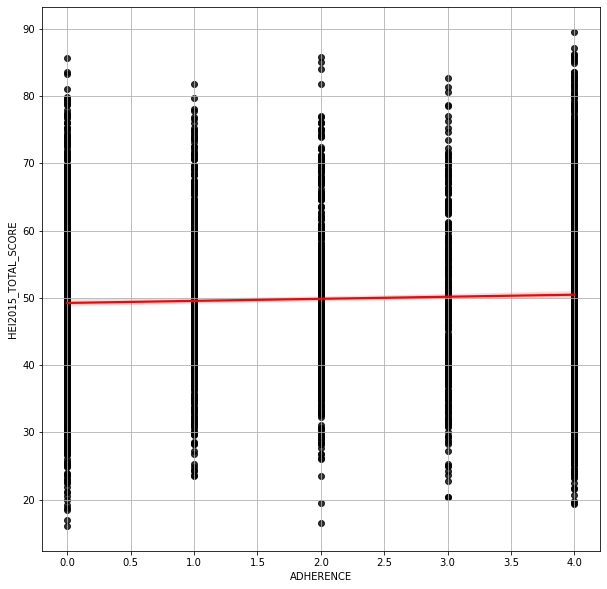

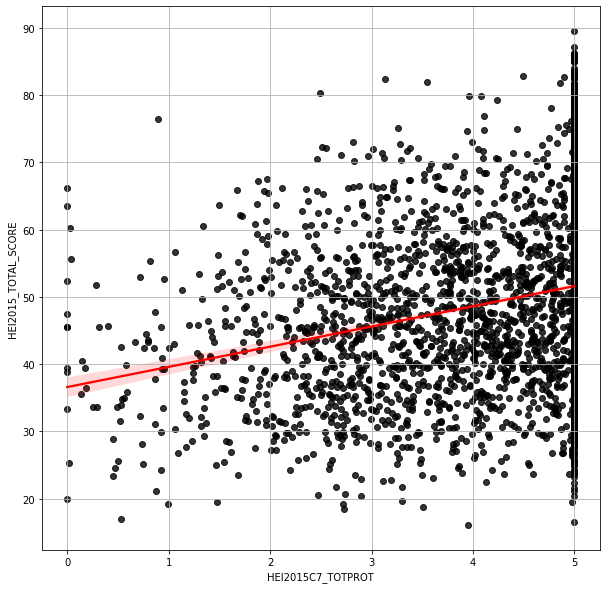

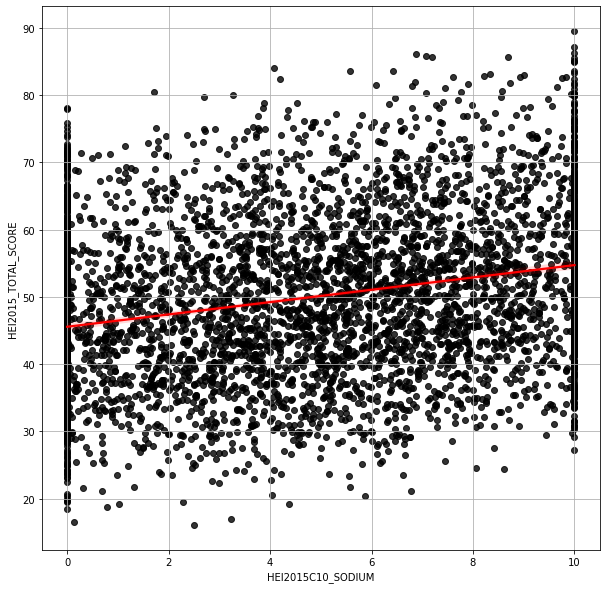

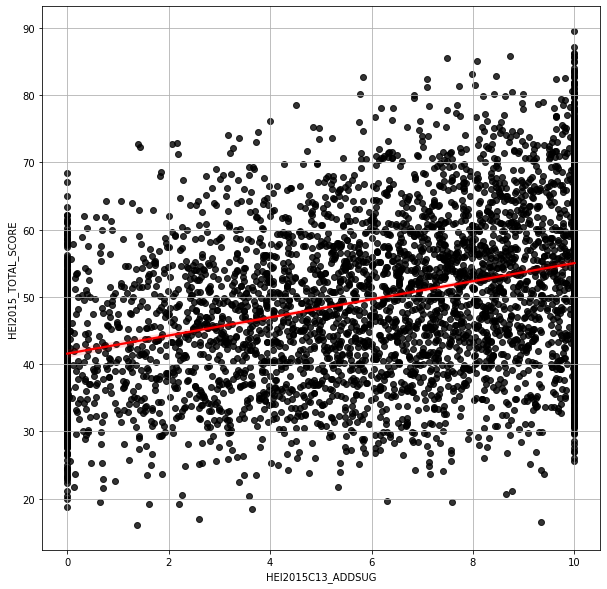

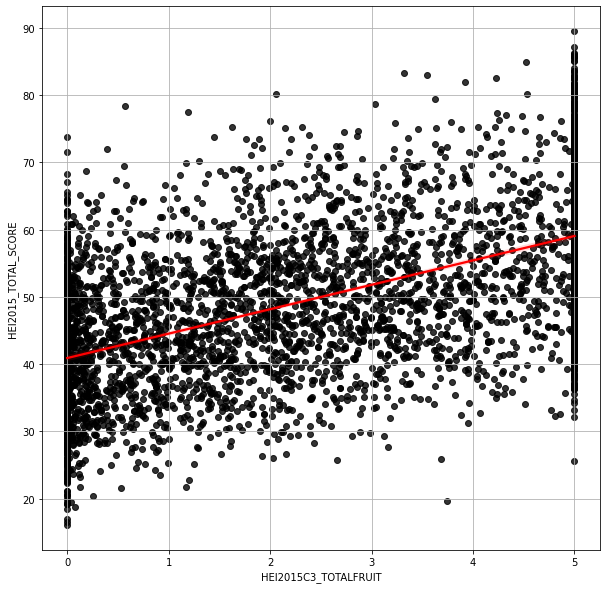

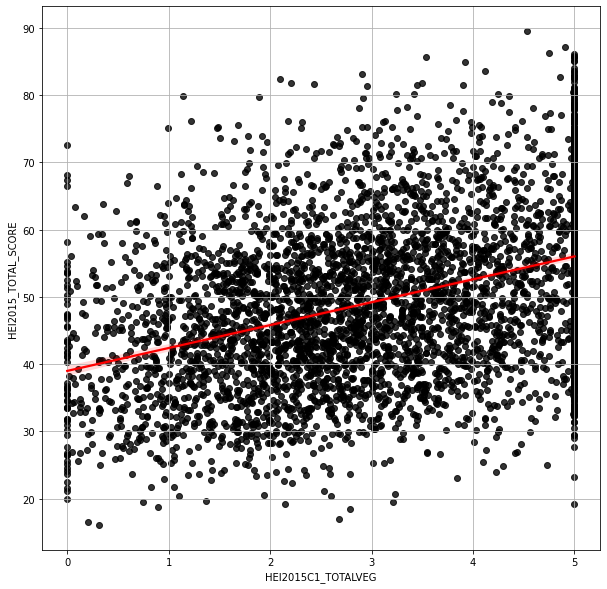

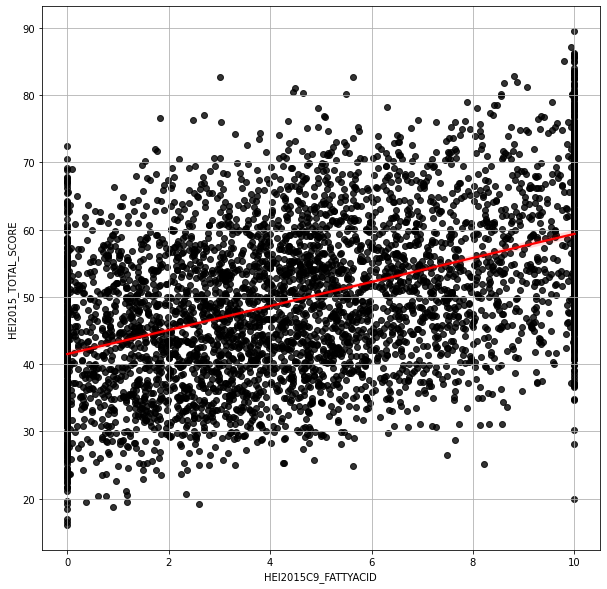

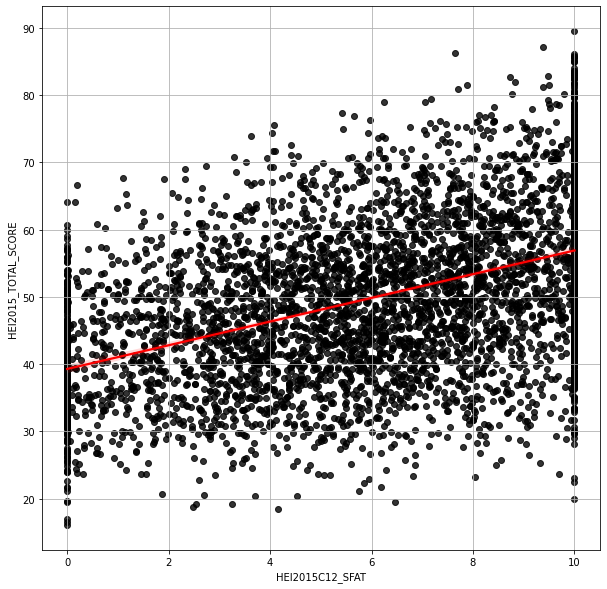

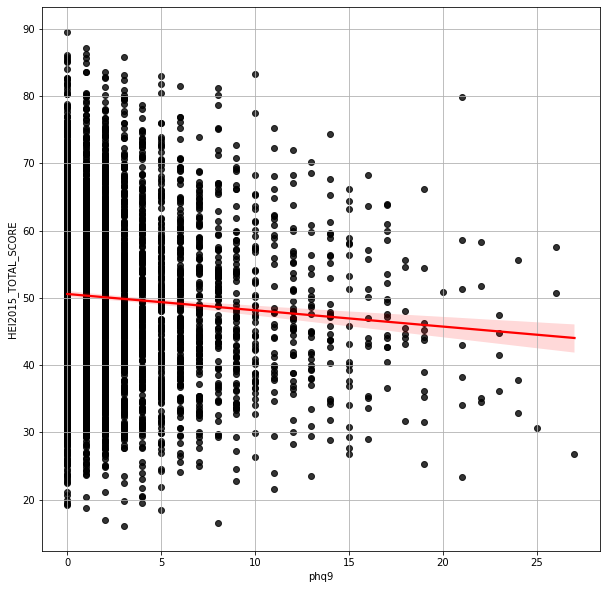

In [32]:
lista.remove("TotalScore_grp")
lista.remove("HEI2015_TOTAL_SCORE")
lista.append("phq9")
for name in lista:
    plt.figure(figsize=(10, 10))
    sns.regplot(x=final_df[name], y=final_df["HEI2015_TOTAL_SCORE"], scatter_kws={"color": "black"}, line_kws={"color": "red"})
    plt.grid()
    plt.show()

In [37]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
mod1 = smf.ols(formula = 'phq9 ~ HEI2015_TOTAL_SCORE', data = final_df)
res = mod1.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   phq9   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     25.06
Date:                Mon, 27 Jun 2022   Prob (F-statistic):           5.76e-07
Time:                        17:31:50   Log-Likelihood:                -12749.
No. Observations:                4669   AIC:                         2.550e+04
Df Residuals:                    4667   BIC:                         2.551e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.8160    

In [36]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
mod1 = smf.ols(formula = 'TotalScore_grp ~ HEI2015_TOTAL_SCORE', data = final_df)
res = mod1.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         TotalScore_grp   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                 1.375e+04
Date:                Mon, 27 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:27:15   Log-Likelihood:                -802.41
No. Observations:                4669   AIC:                             1609.
Df Residuals:                    4667   BIC:                             1622.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.4955    

In [35]:
final_df.to_csv('TABLETOPBI.csv', index=False)